In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
%%time
df = pd.read_csv("train.csv")

Wall time: 20 s


In [8]:
#remove subtypes
df = df.drop(["severe_toxicity","obscene","threat","insult","identity_attack","sexual_explicit"],axis=1)

In [9]:
df.head()

,id,target,comment_text,asian,atheist,bisexual,black,buddhist,christian,female,...,parent_id,article_id,rating,funny,wow,sad,likes,disagree,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006,rejected,0,0,0,0,0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006,rejected,0,0,0,0,0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006,rejected,0,0,0,0,0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006,rejected,0,0,0,0,0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2006,rejected,0,0,0,1,0,4,47


In [11]:
df.describe()

,id,target,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,...,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,...,1.804874e+06,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,0.011964,0.003205,0.001884,0.034393,0.001410,0.095268,0.127670,0.003237,...,4.986296e+01,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,0.087166,0.050193,0.026077,0.167900,0.030923,0.256671,0.305384,0.045801,...,2.769869e+01,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.100000e+01,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.400000e+01,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.400000e+01,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.150000e+02,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.866000e+03,4.936000e+03


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 39 columns):
id                                     int64
target                                 float64
comment_text                           object
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                 float64
latino                                 float64
male                                   float64
muslim                                 float64
other_disability                       float

### EDA


In [15]:
df["comment_length"] = df["comment_text"].apply(lambda x: len(x))

Text(0.5,1,'Comment Length')

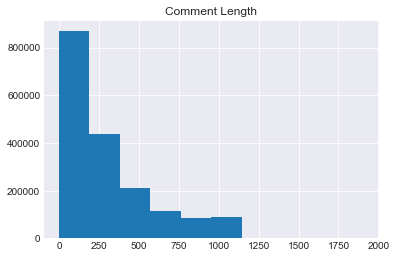

In [21]:
plt.hist(df["comment_length"])
plt.title("Comment Length")

Text(0.5,1,'Toxicity')

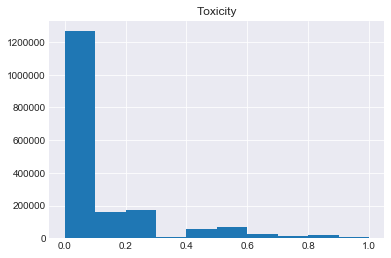

In [23]:
plt.hist(df["target"])
plt.title("Toxicity")

In [24]:
df["target_binary"] = df["target"].apply(lambda x: 1 if x >= 0.5 else 0)

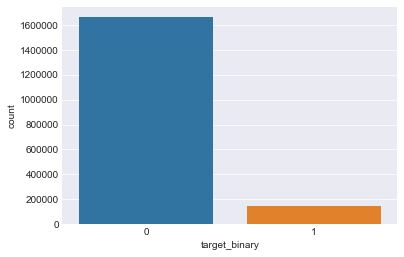

In [37]:
sns.countplot(x="target_binary",data=df)

In [31]:
df["target_binary"].sum()/len(df["target_binary"])

0.0799690172277954

Serious data imbalance, only 8% of comments are toxic. Will most likely need to employ sampling techniques such as Down, UP , ROSE or SMOTE.